<a href="https://colab.research.google.com/github/AlaxanderLee/Test/blob/master/1_3_%EB%A7%88%EC%BC%93%EA%B3%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-3 마켓과 머신러닝

## 생선 분류 문제

### 도미 데이터 준비

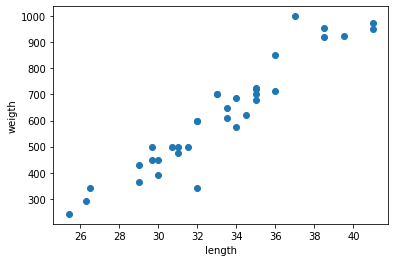

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)

plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

### 빙어 데이터 준비

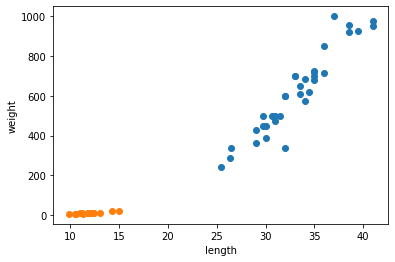

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### 도미, 빙어 데이터 세트 준비

In [ ]:
# 두 리스트를 더하여 하나로 만들기.
length = bream_length + smelt_length
weight = bream_weight + bream_weight

print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [ ]:
# 각 특성의 리스트를 세로 방향 2차원 리스트로 만들기.
fish_data = [[l, w] for l, w in zip(length, weight)] # length와 weight 리스트에서 원소를 하나씩 꺼내서 l과 w에 할당

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 242.0], [10.5, 290.0], [10.6, 340.0], [11.0, 363.0], [11.2, 430.0], [11.3, 450.0], [11.8, 500.0], [11.8, 390.0], [12.0, 450.0], [12.2, 500.0], [12.4, 475.0], [13.0, 500.0], [14.3, 500.0], [15.0, 340.0]]


In [ ]:
# 도미 35마리, 빙어 14마리로 정답 리스트 만들기.
fish_target = [1] * 35 + [0] * 14

print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 이웃 알고리즘

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # n_neighbors의 기본값은 5임. 

kn.fit(fish_data, fish_target) # 알고리즘 훈련.

kn.score(fish_data, fish_target) # 정확도 확인.

1.0

In [ ]:
kn.predict([[30, 600]]) # 도미로 예측.

array([1])

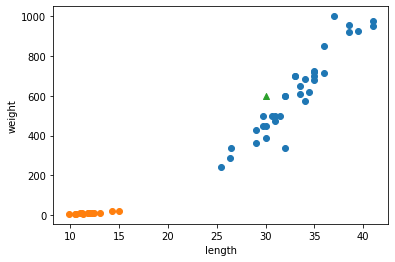

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
print(kn._fit_X) # kn._fit_X에 fish_Data를 가짐.

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8  242. ]
 [  10.5  290. ]
 [  10.6  340. ]
 [  11.   363. ]
 [  11.2  430. ]
 [  11.3  450. ]
 [  11.8  500. ]
 [  11.8  390. ]
 [  12.   450. ]
 [  12.2  500. ]
 [  12.4  475. ]
 [  13.   500. ]
 [  14.3  500. ]
 [  15.   340. ]]


In [ ]:
print(kn._y) # kn._y에 fish_target을 가짐.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 49개 모두 사용하여 예측함. 무조건 도미로 예측함.

kn49.fit(fish_data, fish_target)

kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49) # 무조건 도미만 예측하므로 위의 kn49.score와 같은 예측값. 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)
# n_neighbors=49는 옳지 않음.

0.7142857142857143


## 마무리


### 핵심 패키지와 함수

- scatter(): [마커 종류](https://bit.ly/matplotlib_marker)
- KNeighborsClassifier(): p 매개변수로 거리 재는 방법 지정.기본값은 2.
1일 경우 [맨해튼 거리](https://bit.ly/man_distance). 
2일 경우 [유클리디안 거리](https://bit.ly/euc_distance).

### 확인문제 4

n_neighbors의 기본값인 5부터 49까지 바꾸며 점수가 1.0 아래로 내려가는 이웃 개수 찾기

In [ ]:
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

for n in range(5, 50) : # 5에서 49까지 돌림

    kn.n_neighbors = n

    score = kn.score(fish_data, fish_target)

    if score < 1 :
        print(n, score)
        break

6 0.9183673469387755
